# **Import Library**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# **Import Data**

In [ ]:
df_customer = pd.read_csv('Customer.csv', sep= ';')
df_product = pd.read_csv('Product.csv', sep= ';')
df_store = pd.read_csv('Store.csv', sep= ';')
df_transaction = pd.read_csv('transaction.csv', sep= ';')

# **Data Preparation**

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
df1 = pd.merge(df_transaction, df_customer, on='CustomerID', how='inner')
df2 = pd.merge(df1, df_store, on = 'StoreID', how = 'inner')
df_akhir = pd.merge(df2, df_product, on = 'ProductID', how = 'inner')
df_akhir.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,7500


In [ ]:
df_akhir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

In [ ]:
(df_akhir['Price_x']/df_akhir['Price_y']).value_counts()

1.0    5020
dtype: int64

In [ ]:
df_akhir.drop(columns ='Price_y', inplace = True)

In [ ]:
df_akhir.isna().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
Product Name       0
dtype: int64

In [ ]:
df_akhir.duplicated().sum()

0

In [ ]:
#drop missing values karena tidak signifikan jumlahnya
df_akhir.dropna(inplace = True)
df_akhir.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
Product Name      0
dtype: int64

In [ ]:
df_akhir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   4976 non-null   object
 1   CustomerID      4976 non-null   int64 
 2   Date            4976 non-null   object
 3   ProductID       4976 non-null   object
 4   Price_x         4976 non-null   int64 
 5   Qty             4976 non-null   int64 
 6   TotalAmount     4976 non-null   int64 
 7   StoreID         4976 non-null   int64 
 8   Age             4976 non-null   int64 
 9   Gender          4976 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          4976 non-null   object
 12  StoreName       4976 non-null   object
 13  GroupStore      4976 non-null   object
 14  Type            4976 non-null   object
 15  Latitude        4976 non-null   object
 16  Longitude       4976 non-null   object
 17  Product Name    4976 non-null   object
dtypes: int64

In [ ]:
df_akhir.Date

0       01/01/2022
1       17/07/2022
2       26/09/2022
3       08/01/2022
4       10/01/2022
           ...    
5015    14/07/2022
5016    03/09/2022
5017    08/03/2022
5018    07/07/2022
5019    22/05/2022
Name: Date, Length: 4976, dtype: object

**Change Data Type of Irrelevant Data Types**






In [ ]:
df_akhir['Date'] = pd.to_datetime(df_akhir['Date'])
df_akhir['Longitude'] = df_akhir['Longitude'].apply(lambda x: x.replace(',','.')).astype(float)
df_akhir['Latitude'] = df_akhir['Latitude'].apply(lambda x: x.replace(',','.')).astype(float)

In [ ]:
df_akhir.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


In [ ]:
df_akhir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price_x         4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   object        
 12  StoreName       4976 non-null   object        
 13  GroupStore      4976 non-null   object        
 14  Type            4976 non-null   object        
 15  Lati

# Time Series Regression Analysis

<Axes: xlabel='Date'>

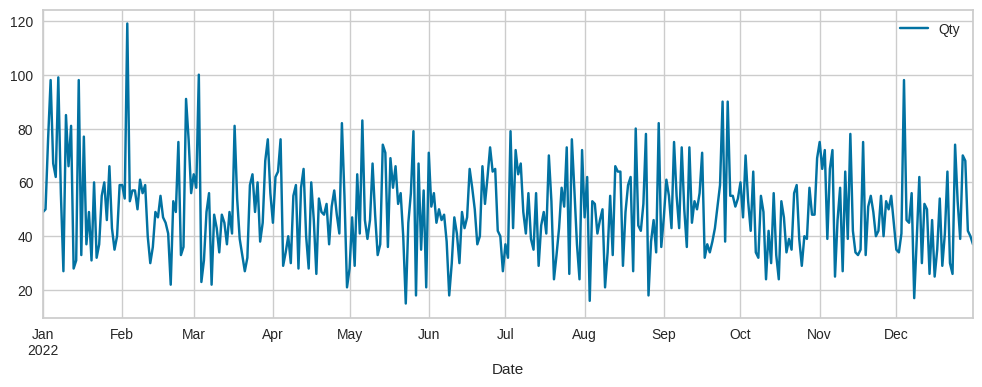

In [ ]:
df_regression = df_akhir.groupby('Date').agg({'Qty':'sum'})
df_regression.plot(figsize=(12,4))

In [ ]:
#Split Data Train & Data Test
print(df_regression.shape)
test_size = round(df_regression.shape[0] * 0.15)
train=df_regression.iloc[:-1*(test_size)]
test=df_regression.iloc[-1*(test_size):]
print(train.shape,test.shape)

(365, 1)
(310, 1) (55, 1)


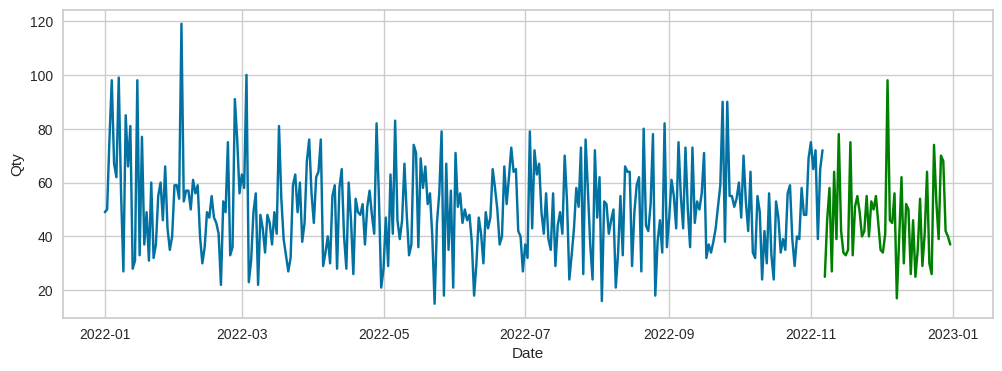

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(data=train, x=train.index, y=train['Qty'])
sns.lineplot(data=test, color="green", x=test.index, y=test['Qty'])
plt.show()

# **Data Stationary Check**

In [ ]:
def adf_test(dataset):
     df_test = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",df_test[0])
     print("2. P-Value : ", df_test[1])
     print("3. Num Of Lags : ", df_test[2])
     print("4. Num Of Observations Used For ADF Regression:", df_test[3])
     print("5. Critical Values :")
     for key, val in df_test[4].items():
         print("\t",key, ": ", val)
adf_test(df_regression)

1. ADF :  -19.091513872408132
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 364
5. Critical Values :
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


P-Value < 0.05 shows that the data is stationary and can be used in time series analysis with ARIMA

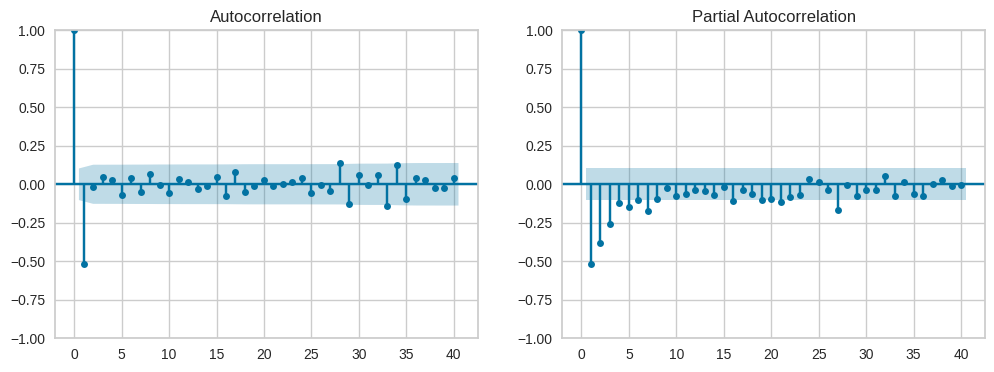

In [ ]:
# ACF and PACF plots to determine p and q values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_regression.diff().dropna(), lags=40, ax=ax[0])
plot_pacf(df_regression.diff().dropna(), lags=40, ax=ax[1])
plt.show()

The Autocorrelation graph (ACF) shows that the p order is 2 because the first and second lag is significantly out of the significant limit,
meanwhile the Partial Autocorrelation graph (PCF) shows that the q order is 3 due to the significant correlation of the first until third lag.

# **Modelling**

Auto-fit ARIMA

In [ ]:
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Hyperparameter Tuning

In [ ]:
# Make p, d, q list
p = range(0, 4)  # 0-3
d = range(0, 4)  # 0-3
q = range(0, 4)  # 0-3
# make p, d, dan q combination using product function
pdq = list(product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]


In [ ]:
# Membuat list untuk menyimpan Skor AIC
aic_scores = []
# Melakukan grid search manual untuk menemukan p, d, q yang optimal
for param in pdq:
    # Melakukan fitting ARIMA model
    model = ARIMA(df_regression, order=param)
    model_fit = model.fit()
    # Menambahkan aic score ke list
    aic_scores.append({'par': param, 'aic': model_fit.aic})

# Memilih aic score terkecil
best_aic = min(aic_scores, key=lambda x: x['aic'])
print(best_aic)

{'par': (0, 1, 1), 'aic': 3092.322287245266}


In [ ]:
#Hyperparameter tuning
model_hyper = ARIMA(train, order=best_aic['par'])
model_fit_hyper = model_hyper.fit()

Manual Hyperparameter Tuning

In [ ]:
#Trial and error tuning
model_manual = ARIMA(train, order=(40,2,2))
model_fit_manual = model_manual.fit()

Plot Forecasting

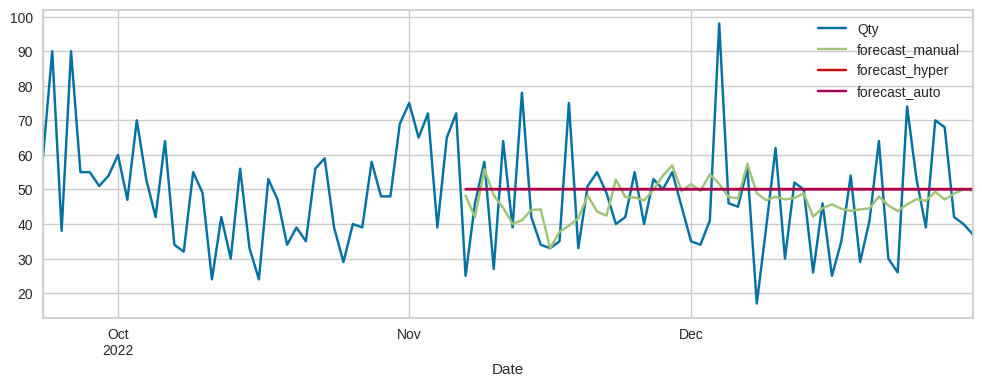

In [ ]:
#plot forecasting
forecast_manual = model_fit_manual.forecast(len(test))
forecast_hyper = model_fit_hyper.forecast(len(test))
forecast_auto = auto_arima.predict(len(test))

df_plot = df_regression.iloc[-100:]

df_plot['forecast_manual'] = [None]*(len(df_plot)-len(forecast_manual)) + list(forecast_manual)
df_plot['forecast_hyper'] = [None]*(len(df_plot)-len(forecast_hyper)) + list(forecast_hyper)
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)

df_plot.plot(figsize=(12, 4))
plt.show()

**Metrics Evaluation**

In [ ]:
# Manual parameter tuning metrics
mae = mean_absolute_error(test, forecast_hyper)
mape = mean_absolute_percentage_error(test, forecast_hyper)
rmse = np.sqrt(mean_squared_error(test, forecast_hyper))

print(f'Mean Absolute Error - manual            : {round(mae,4)}')
print(f'Mean Absolute Percentage Error - manual : {round(mape,4)}')
print(f'Root Mean Square Error - manual         : {round(rmse,4)}')

Mean Absolute Error - manual            : 12.9755
Mean Absolute Percentage Error - manual : 0.3443
Root Mean Square Error - manual         : 16.0214


In [ ]:
#Auto-fit ARIMA metrics
mae = mean_absolute_error(test, forecast_auto)
mape = mean_absolute_percentage_error(test, forecast_auto)
rmse = np.sqrt(mean_squared_error(test, forecast_auto))

print(f'Mean Absolute Error - auto            : {round(mae,4)}')
print(f'Mean Absolute Percentage Error - auto : {round(mape,4)}')
print(f'Root Mean Square Error - auto         : {round(rmse,4)}')

Mean Absolute Error - auto            : 12.9513
Mean Absolute Percentage Error - auto : 0.3433
Root Mean Square Error - auto         : 16.0013


Manual Hyperparameter Tuning shows the best evaluation metrics.

# Forecast Quantity Sales with The Best **Parameter**

In [ ]:
# Apply model to forecast data
model = ARIMA(df_regression, order=(40, 2, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=31)

In [ ]:
df_regression

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [ ]:
forecast

2023-01-01    55.522850
2023-01-02    45.365625
2023-01-03    46.601857
2023-01-04    51.821827
2023-01-05    43.811827
2023-01-06    34.053507
2023-01-07    44.319597
2023-01-08    36.799181
2023-01-09    42.902827
2023-01-10    52.491762
2023-01-11    39.333893
2023-01-12    39.515478
2023-01-13    43.629085
2023-01-14    37.874386
2023-01-15    42.258892
2023-01-16    45.053499
2023-01-17    44.716496
2023-01-18    52.022226
2023-01-19    40.614621
2023-01-20    41.114380
2023-01-21    50.601092
2023-01-22    37.095331
2023-01-23    40.021007
2023-01-24    55.767671
2023-01-25    48.061899
2023-01-26    41.702404
2023-01-27    50.588655
2023-01-28    41.949924
2023-01-29    41.081245
2023-01-30    46.313646
2023-01-31    46.176329
Freq: D, Name: predicted_mean, dtype: float64

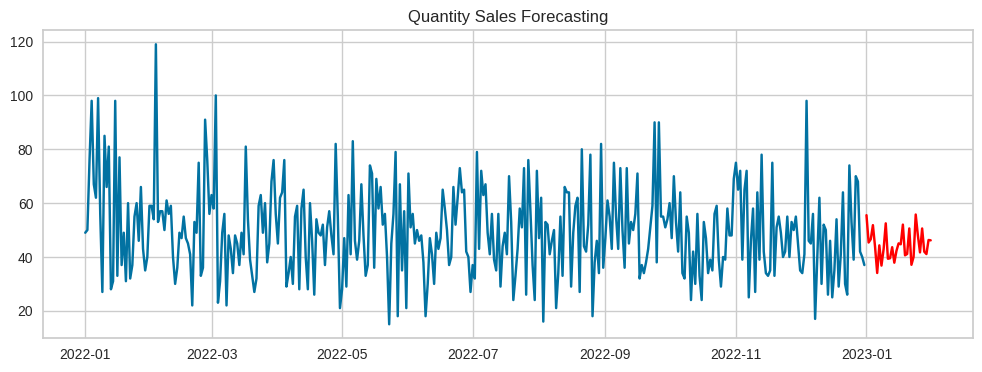

In [ ]:
#Plot forecasting
plt.figure(figsize=(12,4))
plt.plot(df_regression)
plt.plot(forecast,color='red')
plt.title('Quantity Sales Forecasting')
plt.show()

In [ ]:
forecast.describe()

count    31.000000
mean     44.489775
std       5.541639
min      34.053507
25%      40.847933
50%      43.811827
75%      47.331878
max      55.767671
Name: predicted_mean, dtype: float64

From the forecast, the average quantity sales in January 2023 is 44.489775 or up rounded to around 44 pcs/day.


# **Clustering**

In [ ]:
df_akhir.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


In [ ]:
df_preclust = df_akhir.groupby('CustomerID').agg({'TransactionID':'count',
                                                   'Qty':'sum',
                                                   'TotalAmount':'sum'}).reset_index()
df_preclust

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
439,442,13,37,269400
440,444,18,62,577700
441,445,18,68,587200
442,446,11,42,423300


In [ ]:
df_preclust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     444 non-null    int64
 1   TransactionID  444 non-null    int64
 2   Qty            444 non-null    int64
 3   TotalAmount    444 non-null    int64
dtypes: int64(4)
memory usage: 14.0 KB


In [ ]:
df_cluster = df_preclust.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionID  444 non-null    int64
 1   Qty            444 non-null    int64
 2   TotalAmount    444 non-null    int64
dtypes: int64(3)
memory usage: 10.5 KB


In [ ]:
df_cluster.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [ ]:
#Standarisasi dataset
X = df_cluster.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df_cluster.columns)
df_std.isna().sum()

TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [ ]:
#Normalisasi dataset dengan minmaxscaler
X_norm = MinMaxScaler().fit_transform(X)
X_norm

array([[0.77777778, 0.72463768, 0.70394911],
       [0.55555556, 0.68115942, 0.39782666],
       [0.66666667, 0.66666667, 0.46925523],
       ...,
       [0.83333333, 0.84057971, 0.6561092 ],
       [0.44444444, 0.46376812, 0.43890803],
       [0.55555556, 0.46376812, 0.46011132]])

In [ ]:
# Normalisasi dataset dengan preprocessing sklearn
X_norm2 = preprocessing.normalize(df_cluster)
X_norm2

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [ ]:
X_std

array([[ 1.78828224,  1.50893374,  2.10242393],
       [ 0.55344971,  1.27289149,  0.24634281],
       [ 1.17086598,  1.19421074,  0.67942841],
       ...,
       [ 2.09699037,  2.13837973,  1.81236104],
       [-0.06396655,  0.09268025,  0.49542729],
       [ 0.55344971,  0.09268025,  0.62398702]])

In [ ]:
df_std

,TransactionID,Qty,TotalAmount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585
...,...,...,...
439,0.553450,-0.300723,-0.741157
440,2.096990,1.666295,1.736029
441,2.096990,2.138380,1.812361
442,-0.063967,0.092680,0.495427


In [ ]:
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X_std)
    wcss.append(model1.inertia_)
print(wcss)

[1332.0000000000005, 543.4711248616254, 316.54668247055474, 237.60472575971139, 191.11956602309158, 169.32473141353285, 154.03936160517267, 142.48512585227888, 130.90829014139524, 121.69651564034504]


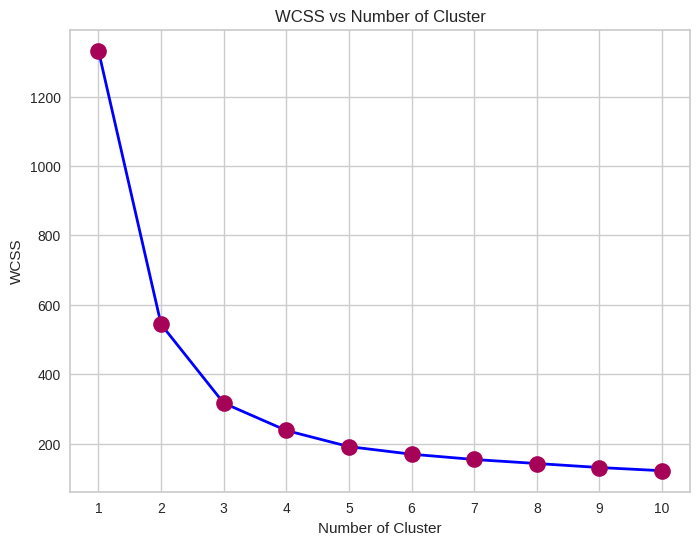

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm',
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.show()

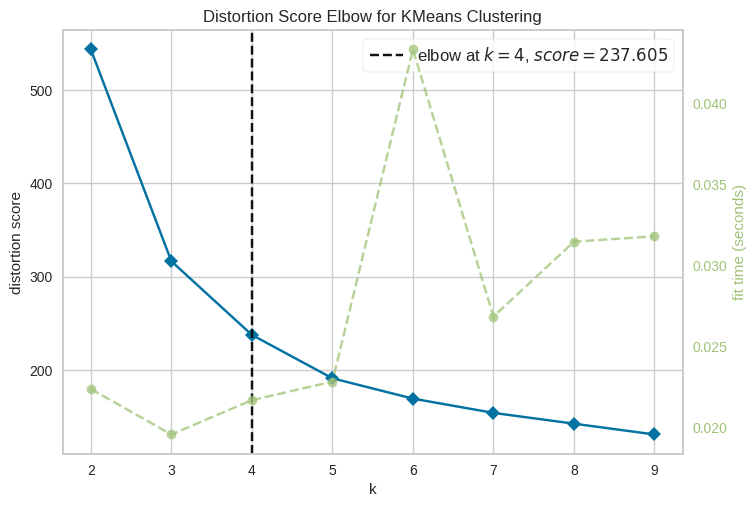

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Elbow Method with yellowbrick library
visualizer = KElbowVisualizer(model1, k=(2,10))
visualizer.fit(X_std)
visualizer.show()

In [ ]:
K = range(2,8)
fits=[]
score=[]

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init= 'auto').fit(X_std)
    fits.append(model)
    score.append(silhouette_score(X_std, model.labels_, metric='euclidean'))

<Axes: >

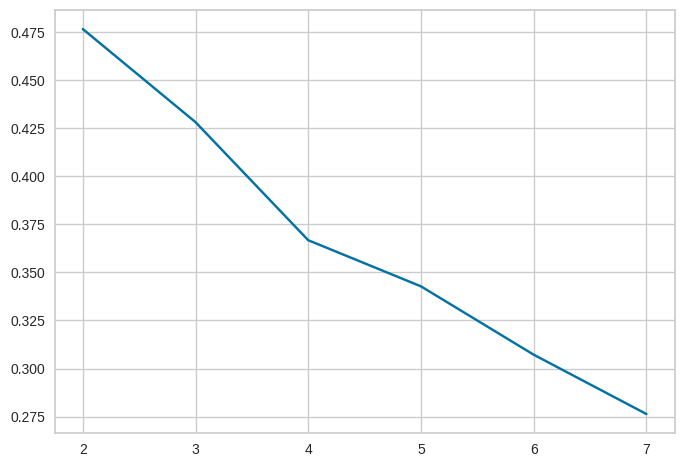

In [ ]:
sns.lineplot(x = K, y = score)

Cluster terbaik (k) terdapat pada 4 cluster

In [ ]:
# Kmeans n_cluster = 4
# Clustering Kmeans
kmeans_4 = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=100)
kmeans_4.fit(X_std)

KMeans(n_clusters=4, n_init=10, random_state=100)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
# Masukin cluster ke dataset
df_cluster['cluster'] = kmeans_4.labels_
df_cluster.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,3
4,7,27,268600,1


<Figure size 600x600 with 0 Axes>

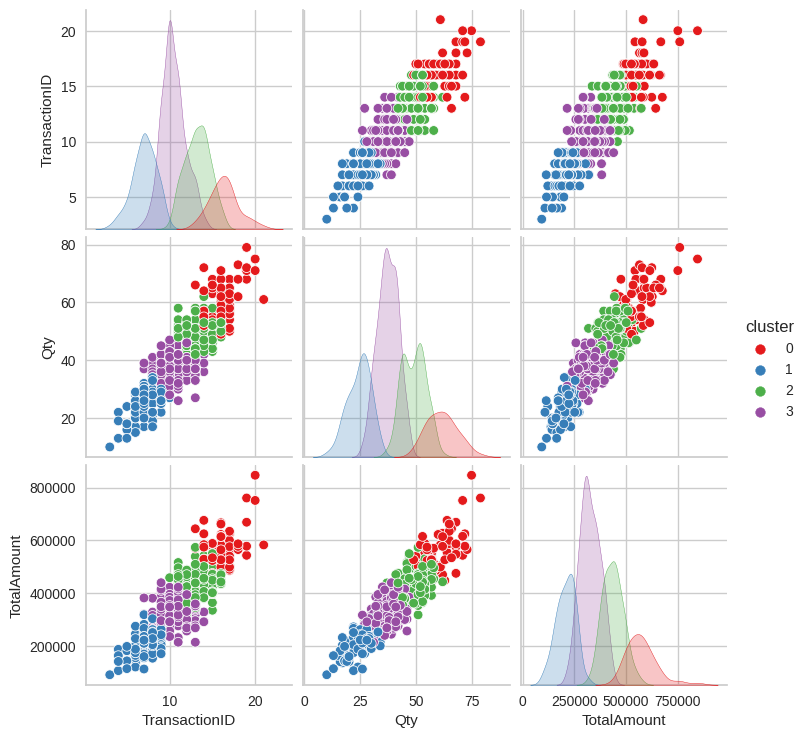

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [ ]:
df_cluster['CustomerID'] = df_preclust['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
3,180,10.427778,37.350000,325663.333333
2,113,13.247788,49.070796,435833.628319
1,93,7.021505,24.505376,208283.870968
0,58,16.362069,61.689655,574650.000000


# **Kesimpulan**


# **Cluster 0**

1.   Memiliki jumlah pelanggan paling sedikit
2.   Memiliki pelanggan dengan nilai tertinggi pada setiap metriksnya

Rekomendasi :
- Melakukan survei kepuasan pelanggan
- Menawarkan promosi loyalitas untuk mempertahankan transaksi


# **Cluster 1**

1.   Karakteristik pelanggan dengan nilai terendah pada setiap metriksnya

Rekomendasi :
- Memberikan diskon produk untuk meningkatkan transaksi
- Melakukan survei untuk mengetahui pengembangan produk

# **Cluster 2**

1.   Karakteristik pelanggan dengan nilai kedua tertinggi pada setiap metriksnya

Rekomendasi :
- Melakukan upselling produk
- Memberikan promo untuk meningkatkan transaksi

# **Cluster 3**

1.   Memilik jumlah pelanggan terbanyak diantara cluster lain
2.   Karakteristik pelanggan dengan nilai ketiga tertinggi pada setiap metriksnya

Rekomendasi :
- Meningkatkan hubungan baik dengan pelanggan
- Memberikan apresiasi terutama kepada pelanggan setia
- Memberikan atau melakukan survei untuk memahami minat dari pelanggan






